<a href="https://colab.research.google.com/github/Muhammad-javed440/Q-3/blob/master/audio_analyzing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio analyzing in wave form and spectogram graph and playing audio clip

In [16]:
# To run our project we install some Python packages:
# google-generativeai: A package related to Google's generative AI tools.
# langchain-google-genai: Likely an integration package for LangChain with Google's generative AI.
!pip install -q --upgrade google-generativeai langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 1.3 MB/s eta 0:00:00


In [17]:
# Step 1: Install required a Python library that used for audio and music analysis.
!pip install librosa matplotlib numpy

In [18]:
import google.generativeai as genai    # To import generativeai ae genai this method


In [19]:
from google.colab import userdata
GEMINI_API_KEY: str = userdata.get('GEMINI_API_KEY')
if(GEMINI_API_KEY):
  print("API Key found")
else:
  print("API Key not found")

API Key found


In [6]:
# Setting api key
from google.genai import Client
client:Client = Client(api_key=GEMINI_API_KEY )
# Creating model
model:str = "gemini-2.0-flash-exp"

In [20]:
# Step 2: Import necessary libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [21]:
# Step 3: Upload an audio file
print("Upload your audio file for analysis...")
uploaded = files.upload()

# Automatically take the first uploaded file
audio_path = list(uploaded.keys())[0]
print(f"Audio file '{audio_path}' uploaded successfully!")

Upload your audio file for analysis...


Saving db.wav to db.wav
Audio file 'db.wav' uploaded successfully!


In [22]:
# Step 4: Load the audio file
print("Analyzing the audio file...")
y, sr = librosa.load(audio_path, sr=None)   # y: The audio time series

Analyzing the audio file...


In [23]:
# Step 5: Display basic information
print(f"Sample Rate: {sr} Hz")                  # sr: The sampling rate of the audio signal.
print(f"Duration: {len(y) / sr:.2f} seconds")
print("Audio successfully loaded for analysis.")

Sample Rate: 48000 Hz
Duration: 27.84 seconds
Audio successfully loaded for analysis.


Generating waveform plot...


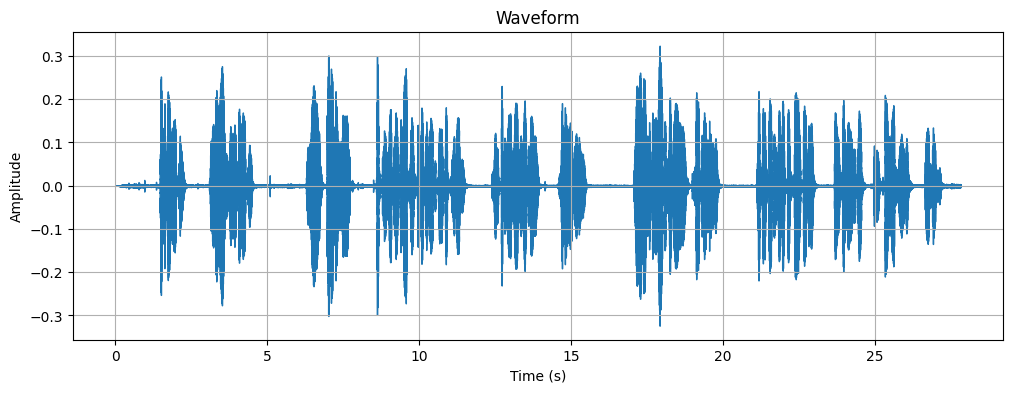

In [24]:
# Step 6: Display the waveform
print("Generating waveform plot...")
plt.figure(figsize=(12, 4)) # plt ( Python's Matplotlib library)
                            # plt.figure(): This function initializes a new figure or activates an existing one.
                            # figsize=(12, 4): This argument specifies the size of the figure in inches.
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

Generating spectrogram...


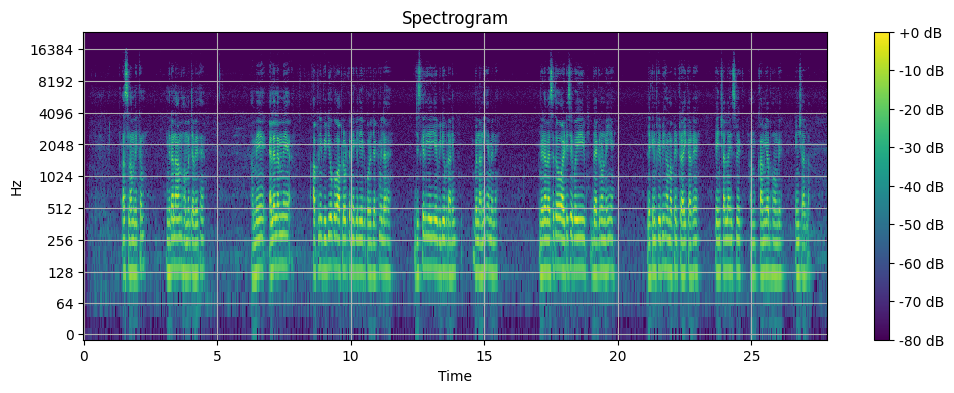

In [25]:
# Step 7: Generate and display the spectrogram
print("Generating spectrogram...")
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)  # librosa.stft(y): Computes the Short-Time Fourier Transform (STFT) of the audio signal y.
                     # np.abs(...):  (absolute value) of the complex numbers returned by the STFT.
                     # librosa.amplitude_to_db(...): Converts the amplitude (linear scale) to decibels (logarithmic scale).

plt.figure(figsize=(12, 4))   # matplotlib library in Python to set up a figure for plotting.
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='viridis')

  # librosa.display.specshow: This function is used to display spectrogram-like data (e.g., a matrix of audio feature representations).


plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.grid()
plt.show()

In [26]:
# Step 8: Extract tempo and beats
print("Extracting tempo and beats...")
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print(f"Tempo: {tempo[0]:.2f} BPM")
print(f"Beats (frame indices): {beats}")


Extracting tempo and beats...
Tempo: 200.89 BPM
Beats (frame indices): [ 140  168  196  225  254  282  310  339  368  395  423  451  478  507
  535  563  591  623  654  681  706  731  757  782  808  831  859  882
  907  934  962  996 1025 1055 1084 1112 1140 1168 1193 1222 1251 1281
 1313 1345 1377 1405 1433 1462 1491 1520 1549 1578 1606 1631 1658 1686
 1714 1741 1768 1793 1817 1845 1873 1901 1929 1957 1985 2013 2035 2064
 2093 2125 2157 2189 2221 2251 2281 2312 2342 2370 2397 2422 2448 2474
 2500]


In [27]:
# Step 9: Play the audio (optional, requires IPython.display)
try:
    from IPython.display import Audio
    print("Playing audio...")
    display(Audio(audio_path))
except ImportError:
    print("IPython.display.Audio is not available. Skipping audio playback.")


Playing audio...


In [28]:
# Step 10: Analysis complete
print("Audio analysis complete! Waveform, spectrogram, and tempo information displayed.")

Audio analysis complete! Waveform, spectrogram, and tempo information displayed.
